# Understanding Weight Updating In Backpropgation

## Introduction

Earlier this month, I had an intuitive idea to understand why backpropagation works so well. But to start dissecting backpropagation, I had to understand it 
fully, and what better way to do that than by making the simplest network and applying backpropagation by hand? 

During my work I had a question. How can we update all the weights at the same time? 
Graditents are calculated when it assumes the other paramters are constant. I am going to investigate how the plot of the loss function changes when the parameters are changing.

Maybe there could be a way to updated gradients without making these assumptions, some sort of multidimensional derivative.



### Simplest Neural Network

This is the simplest neural network I started 
with. (It’s obviously not objectively the simplest, but there was a reason I picked this framework.).

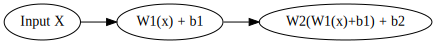

In [7]:
from graphviz import Digraph
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Create a directed graph
dot = Digraph()

# Set the layout to left-to-right
dot.attr(rankdir='LR')

# Add nodes for each layer
dot.node('A', 'Input X')
dot.node('B', 'W1(x) + b1')
dot.node('C', 'W2(W1(x)+b1) + b2')

# Connect nodes to show forward pass flow
dot.edges(['AB', 'BC'])

# Display the graph
dot


### Training Data

For this experiment, I used the simplest training set, a NOT gate

$$
\begin{array}{|c|c|c|}
\hline
\textbf{Input} & \textbf{Output} \\
\hline
1 & 0  \\
\hline
0 & 1  \\
\hline
\end{array}
$$


### Loss function

This is the simplest loss function : the mean squared error

$$
\sum_{i=1}^{n}L(x_{i}) = \sum_{i=1}^{n}(y(x_{i}) - \hat y_{i})^2
$$




where $y$ is the output of the neural network and $\hat{y}$ is the expected output

## 1. Backpropagation By Hand

Here is backpropagation implemented by hand 

$$ y(x) = w_{2}(w_{1}x+b_{1}) + b_{2}$$

Since there are only two training example, its easy to show the full sum fo the loss function.

When x is 1 and the output is 0:


$$ y(1) = w_{2}(w_{1}+b_{1}) + b_{2}$$

$$ \hat y_{1} = 0$$

When x is 0 and the output is 1:



$$ y(0) = w_{2}(w_{1}0+b_{1}) + b_{2}$$

$$ y(0) = w_{2}(b_{1}) + b_{2}$$

$$ \hat y_{0} = 1$$



Lets calculate the loss function of each training example separately:


$$ L(1) = (y(1) - \hat y_{1})^2$$

$$ L(1) = (w_{2}(w_{1}+b_{1}) + b_{2} - 0)^2$$

$$ L(1) = (w_{2}(w_{1}+b_{1}) + b_{2} )^2$$

$$ L(1) = (w_{2}w_{1}+w_{2}b_{1}+ b_{2} )^2$$

Next example:

$$ L(0) = (y(0) - \hat y_{0})^2$$

$$ L(0) = (w_{2}(b_{1}) + b_{2} - 1)^2$$

$$ L(0) = (w_{2}b_{1} + b_{2} -1)^2$$




Now the some of the loss functions:


$$\sum_{i=0}^{1}L(x_{i}) = L(0) + L(1) = (w_{2}w_{1}+w_{2}b_{1}+ b_{2} )^2 + (w_{2}b_{1} + b_{2} -1)^2$$

This is the function I am trying to minimize:

$$ Total*Loss = (w_{2}w_{1}+w_{2}b_{1}+ b_{2} )^2 + (w_{2}b_{1} + b_{2} -1)^2$$



## 2. Graphing the Loss Function


Let's make the loss function:


In [8]:
# Define your function in terms of w1, w2, b1, b2
def func(w1,b1,w2=1,b2=1):
    # Example function; modify to match your actual function
    return (w2*b1+b2-1)**2 + (w2*w1 + w2*b1 + b2)**2


Next we are just going to make a 3d plot of w1 and b1 against Loss

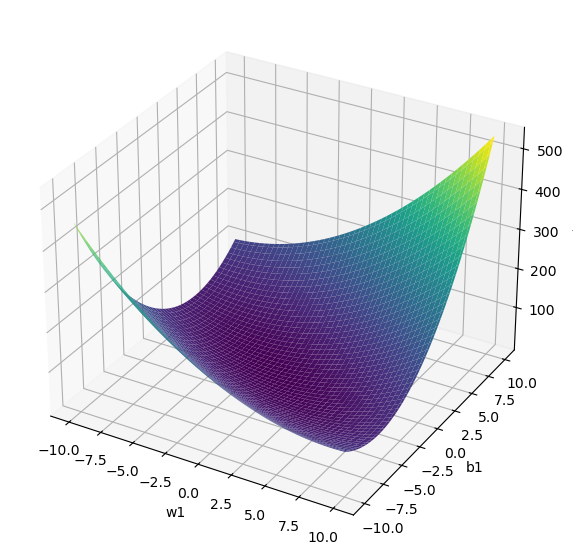

In [12]:
# Generate values for w1 and w2
w1 = np.linspace(-10, 10, 100)
b1 = np.linspace(-10, 10, 100)
w1, b1 = np.meshgrid(w1, b1)  # Create a meshgrid for 3D plotting

# Compute y values based on w1, w2, and constants b1, b2
y = func( w1,b1,w2=1,b2=1)  # Change b1 and b2 as desired

# Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(w1, b1, y, cmap='viridis')

# Labeling the axes
ax.set_xlabel('w1')
ax.set_ylabel('b1')
ax.set_zlabel('y')

plt.show()

I found that the 3D plots are hard too see, so I am going to make 2D plots.


What we will do here is plot loss against one parameter, W1. The we will make multiple plots changing one one other parameter to see how the graph changes

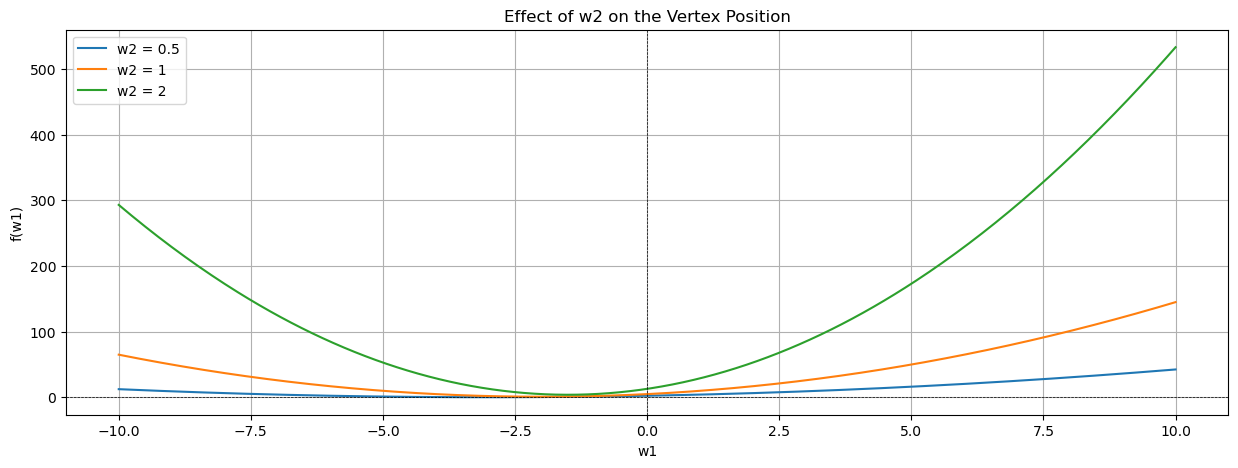

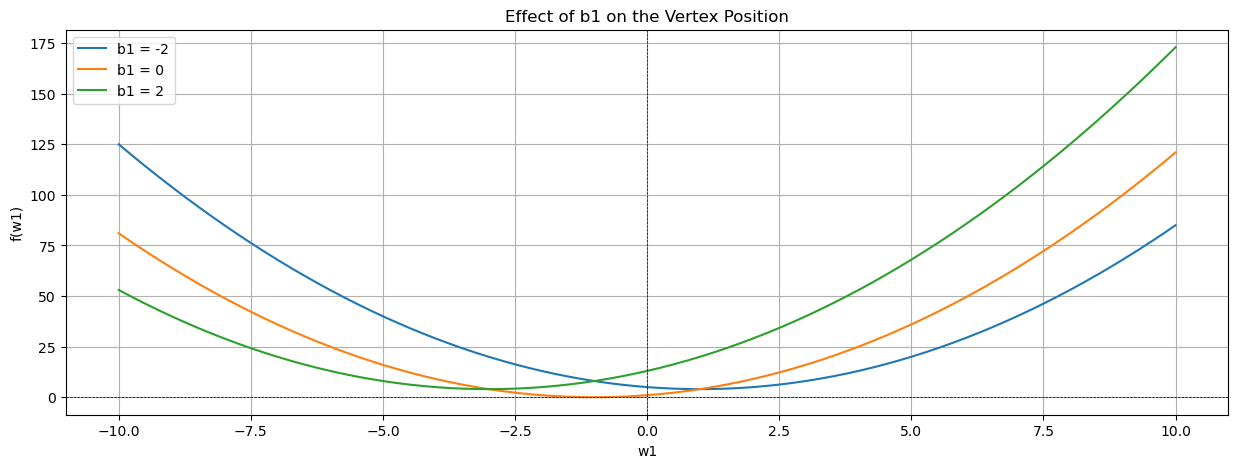

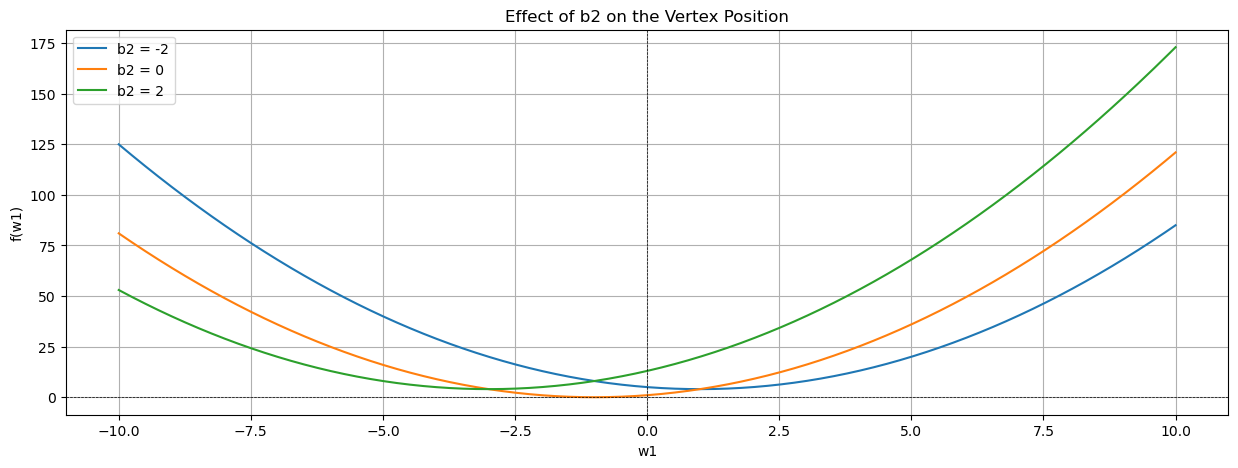

In [15]:

# Define your function in terms of w1, w2, b1, b2

# Define the function
def f(w1, w2, b1, b2):
    return (w2 * b1 + b2 - 1)**2 + (w2 * w1 + w2 * b1 + b2)**2

# Range of w1 values
w1_values = np.linspace(-10, 10, 400)

# Plot 1: Varying w2
plt.figure(figsize=(15, 5))

w2_values = [0.5, 1, 2]  # Different w2 values
b1 = 1
b2 = 1

for w2 in w2_values:
    plt.plot(w1_values, f(w1_values, w2, b1, b2), label=f'w2 = {w2}')

plt.title('Effect of w2 on the Vertex Position')
plt.xlabel('w1')
plt.ylabel('f(w1)')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.legend()
plt.grid()
plt.show()

# Plot 2: Varying b1
plt.figure(figsize=(15, 5))

b1_values = [-2, 0, 2]  # Different b1 values
w2 = 1
b2 = 1

for b1 in b1_values:
    plt.plot(w1_values, f(w1_values, w2, b1, b2), label=f'b1 = {b1}')

plt.title('Effect of b1 on the Vertex Position')
plt.xlabel('w1')
plt.ylabel('f(w1)')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.legend()
plt.grid()
plt.show()

# Plot 3: Varying b2
plt.figure(figsize=(15, 5))

b2_values = [-2, 0, 2]  # Different b2 values
w2 = 1
b1 = 1

for b2 in b2_values:
    plt.plot(w1_values, f(w1_values, w2, b1, b2), label=f'b2 = {b2}')

plt.title('Effect of b2 on the Vertex Position')
plt.xlabel('w1')
plt.ylabel('f(w1)')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.legend()
plt.grid()
plt.show()


So here we can clearly see that the b1 and b2 values changes the vertex or minimum position of my loss functions. This makes sense because the relationship between w1 and w2 is multiplicative which stretches the graph. b1 and b2 changes the vertex position. This means that while I am updating the weights and I also update the biases, I'm changing the loss function in a way which the minumum changes. Which means if I am very close to the minimum w1 values, if I change the bias, the minimum will change. This might cause your loss to go back up. In this example actually I find that the loss oscillates, this might be causing that. 

Now lets keep b1 constant and then vary the other parameters:

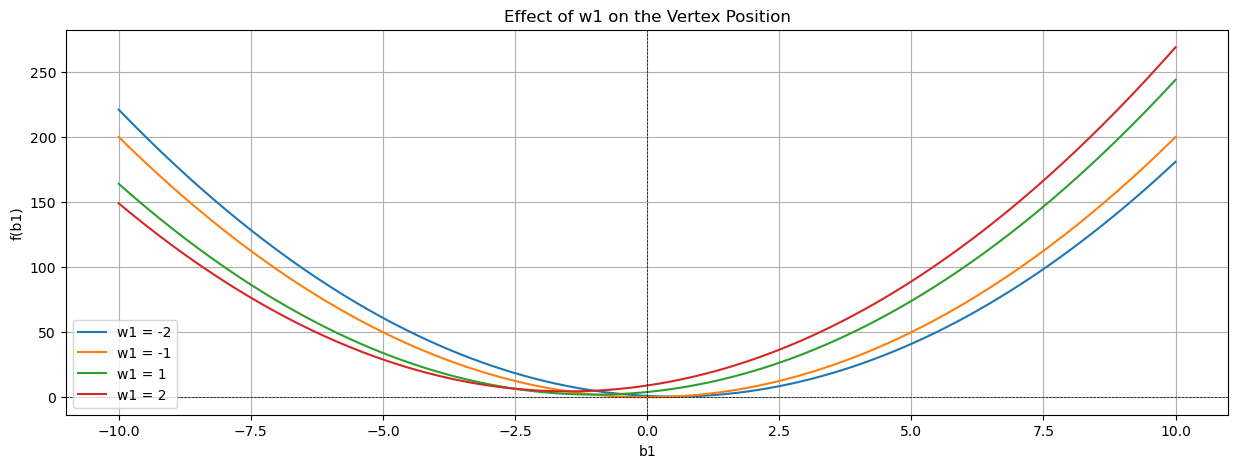

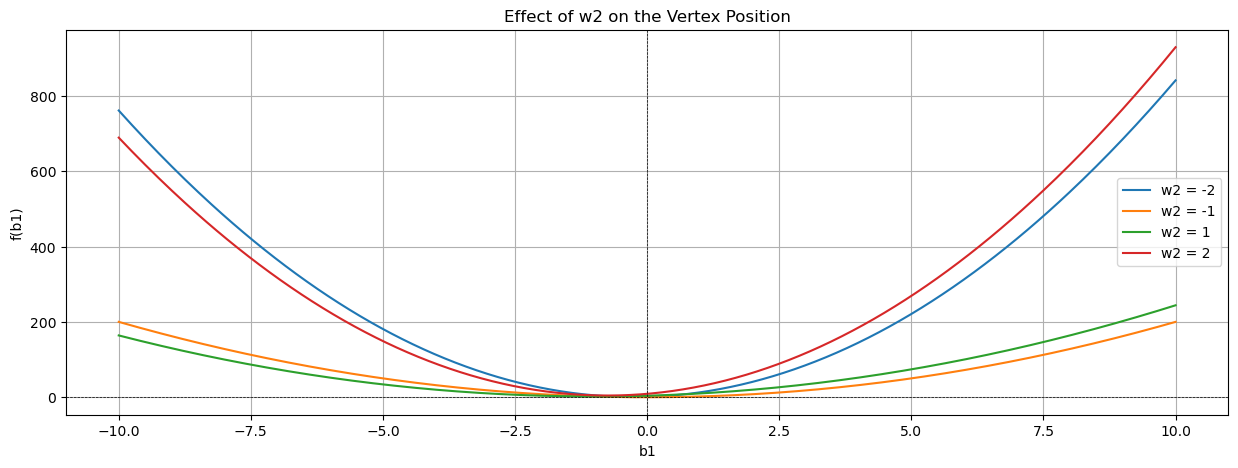

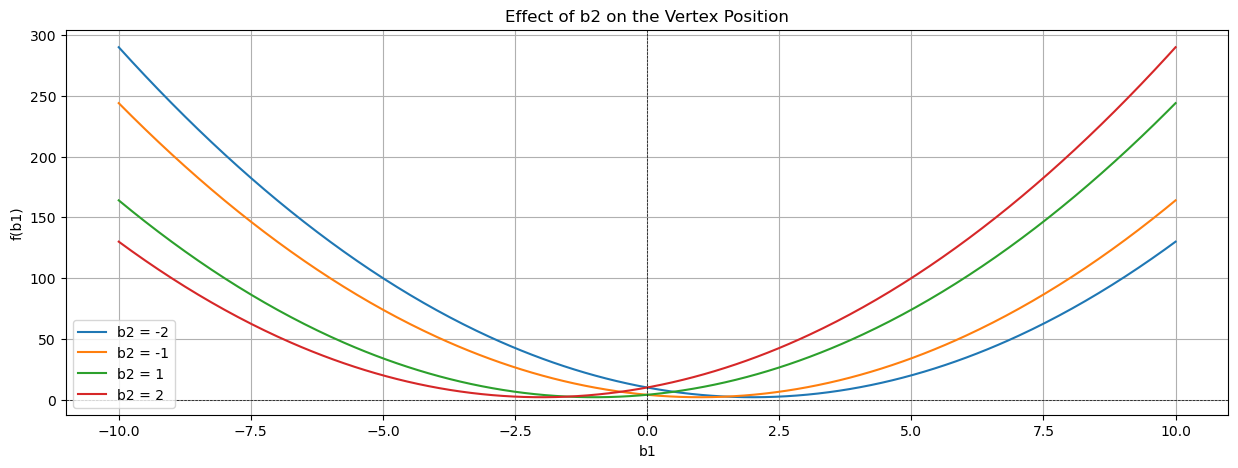

In [19]:

# Define the function
def f(w1, w2, b1, b2):
    return (w2 * b1 + b2 - 1)**2 + (w2 * w1 + w2 * b1 + b2)**2

# Range of w1 values
b1_values = np.linspace(-10, 10, 400)

# Plot 1: Varying w1
plt.figure(figsize=(15, 5))

w1_values = [-2,-1, 1, 2]  # Different w2 values
w2 = 1
b2 = 1

for w1 in w1_values:
    plt.plot(b1_values, f(w1, w2, b1_values, b2), label=f'w1 = {w1}')

plt.title('Effect of w1 on the Vertex Position')
plt.xlabel('b1')
plt.ylabel('f(b1)')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.legend()
plt.grid()
plt.show()

# Plot 1: Varying w2
plt.figure(figsize=(15, 5))

w2_values = [-2,-1, 1, 2]  # Different w2 values
w1 = 1
b2 = 1

for w2 in w2_values:
    plt.plot(b1_values, f(w1, w2, b1_values, b2), label=f'w2 = {w2}')

plt.title('Effect of w2 on the Vertex Position')
plt.xlabel('b1')
plt.ylabel('f(b1)')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.legend()
plt.grid()
plt.show()






# Plot 3: Varying b2
plt.figure(figsize=(15, 5))

b2_values = [-2,-1, 1, 2]  # Different b2 values
w2 = 1
w1 = 1

for b2 in b2_values:
    plt.plot(b1_values, f(w1, w2, b1_values, b2), label=f'b2 = {b2}')

plt.title('Effect of b2 on the Vertex Position')
plt.xlabel('b1')
plt.ylabel('f(b1)')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.legend()
plt.grid()
plt.show()


In this case, w1 and b2 have an addative effect which changes the position of the vertex. w2 howver has a multiplcative effect and an addative effect. But the multiplicative effect takes over. It seems like we should update either the biases first or the weights first. So now lets do some backpropagation.

## 3. Backpropagation normally (updating all weights all the time)

We will use Karpathy's Micrograd for this:

In [118]:

class Value:
  
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"
  
  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')
    
    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward
    
    return out

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')
    
    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
      
    return out
  
  def __pow__(self, other):
    assert isinstance(other, (int, float)), "only supporting int/float powers for now"
    out = Value(self.data**other, (self,), f'**{other}')

    def _backward():
        self.grad += other * (self.data ** (other - 1)) * out.grad
    out._backward = _backward

    return out
  
  def __rmul__(self, other): # other * self
    return self * other

  def __truediv__(self, other): # self / other
    return self * other**-1

  def __neg__(self): # -self
    return self * -1

  def __sub__(self, other): # self - other
    return self + (-other)

  def __radd__(self, other): # other + self
    return self + other

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    
    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward
    
    return out
  
  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self, ), 'exp')
    
    def _backward():
      self.grad += out.data * out.grad # NOTE: in the video I incorrectly used = instead of +=. Fixed here.
    out._backward = _backward
    
    return out
  
  
  def backward(self):
    
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)
    
    self.grad = 1.0
    for node in reversed(topo):
      node._backward()




def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

### Forward propagation:

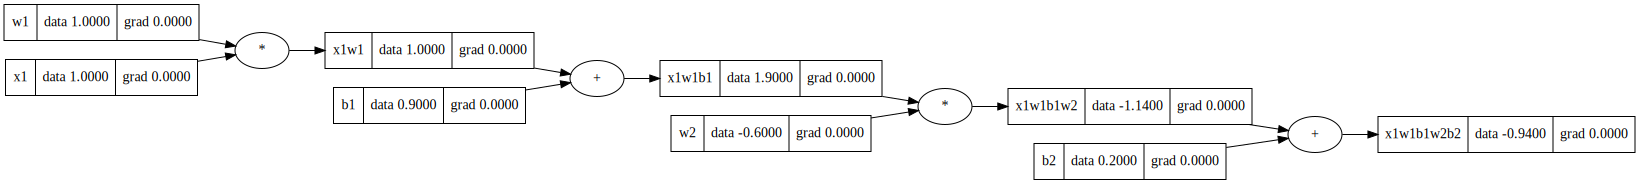

In [119]:
# example 1: 1 -> 0

w1 = Value(1.0,label='w1')
w2 = Value(-0.6,label='w2')
b1 = Value(0.9,label='b1')
b2 = Value(0.2,label='b2')
x1 = Value(1.0,label='x1')
x2 = Value(0.0,label='x2')


x1w1 = x1*w1 ; x1w1.label = 'x1w1'

x1w1b1 = x1w1 + b1 ; x1w1b1.label = 'x1w1b1'

x1w1b1w2 = x1w1b1 * w2 ;  x1w1b1w2.label = 'x1w1b1w2'

x1w1b1w2b2 = x1w1b1w2 + b2; x1w1b1w2b2.label = 'x1w1b1w2b2'

draw_dot(x1w1b1w2b2)

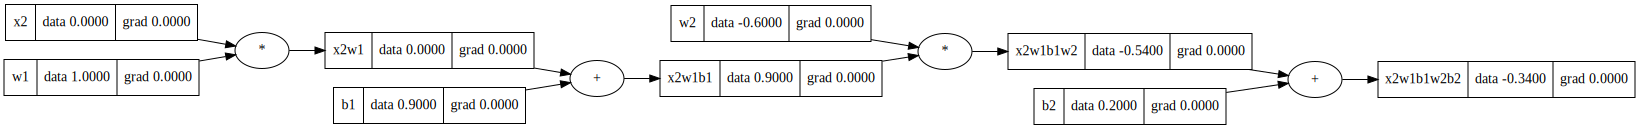

In [120]:
# input 2: 0 -> 1

x2 = Value(0.0,label='x2')


x2w1 = x2*w1 ; x2w1.label = 'x2w1'

x2w1b1 = x2w1 + b1 ; x2w1b1.label = 'x2w1b1'

x2w1b1w2 = x2w1b1 * w2 ;  x2w1b1w2.label = 'x2w1b1w2'

x2w1b1w2b2 = x2w1b1w2 + b2; x2w1b1w2b2.label = 'x2w1b1w2b2'

draw_dot(x2w1b1w2b2)

In [121]:
# these are the expected outputs

y_real_1= Value(0.0,label = 'y_real_1')
y_real_2 = Value(1.0,label = 'y_real_2')

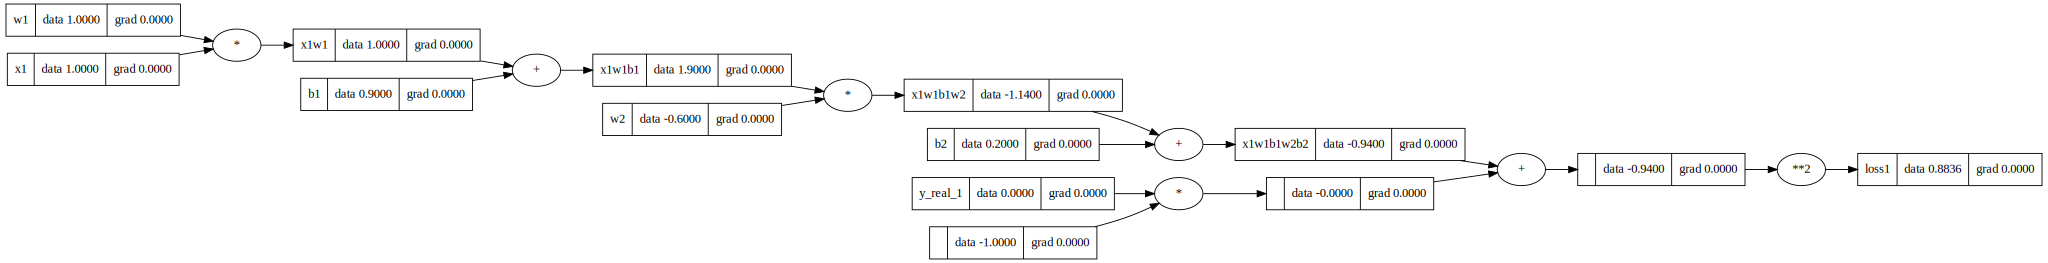

In [122]:
# this is the loss funtion of input 1! I used mean squared error

loss1 = (x1w1b1w2b2 - y_real_1) **2 ; loss1.label = 'loss1'
draw_dot(loss1)

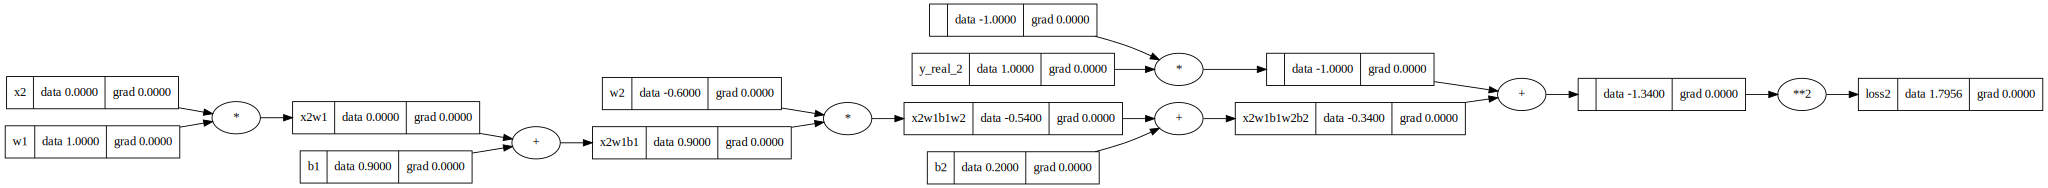

In [123]:
# this is the loss funtion of input 2, again with mean squared error:

loss2 = (x2w1b1w2b2 - y_real_2) **2 ; loss2.label = 'loss2'
draw_dot(loss2)

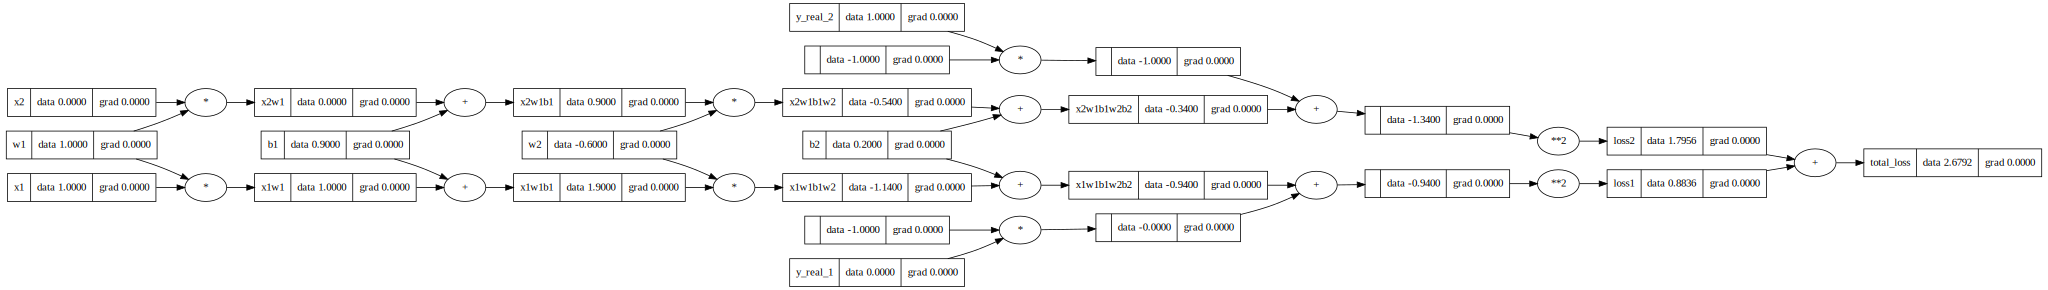

In [124]:
# the total loss is just a sum of the losses

total_loss = loss1+ loss2; total_loss.label = 'total_loss'
draw_dot(total_loss)

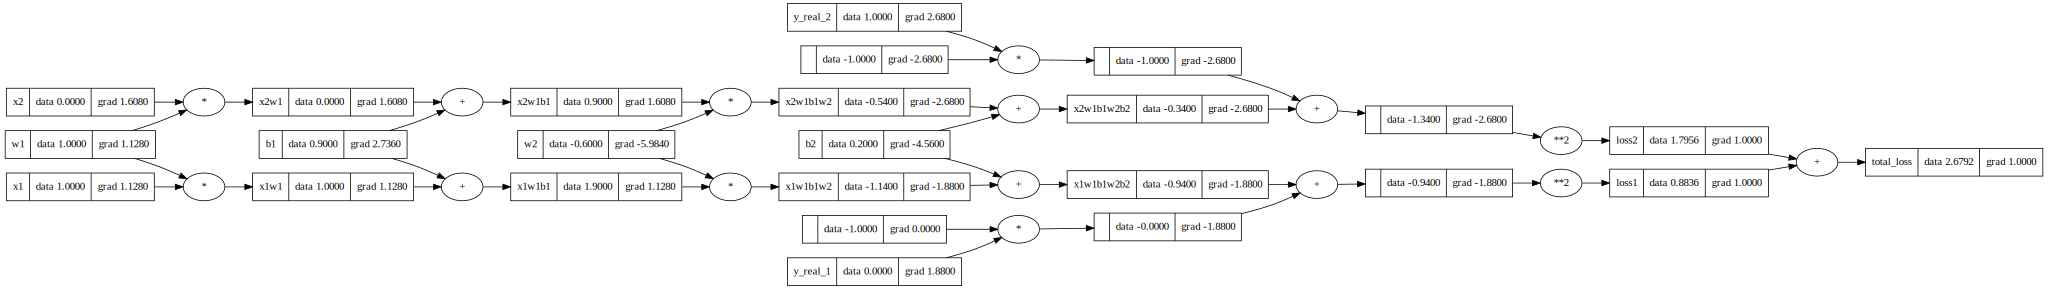

In [125]:
# this is the gradient of the sum of the loss functions with respect to the the weights and all the other parameters

total_loss.backward()
draw_dot(total_loss)

### Backward pass

In [126]:
# backward pass:


w1_total = [w1.data]
w2_total = [w2.data]

b1_total = [b1.data]
b2_total = [b2.data]
all_losses = [total_loss.data]




for i in range(50):
    #updating gradients
    w1.data += -0.01 * w1.grad
    w2.data += -0.01 * w2.grad
    b1.data += -0.01 * b1.grad
    b2.data += -0.01 * b2.grad
    w1_total.append(w1.data)
    w2_total.append(w2.data)
    b1_total.append(b1.data)
    b2_total.append(b2.data)

    
    
    x1w1 = x1*w1 ; x1w1.label = 'x1w1'
    x1w1b1 = x1w1 + b1 ; x1w1b1.label = 'x1w1b1'
    x1w1b1w2 = x1w1b1 * w2 ;  x1w1b1w2.label = 'x1w1b1w2'
    x1w1b1w2b2 = x1w1b1w2 + b2; x1w1b1w2b2.label = 'x1w1b1w2b2'
    
        
    x2w1 = x2*w1 ; x2w1.label = 'x2w1'
    x2w1b1 = x2w1 + b1 ; x2w1b1.label = 'x2w1b1'
    x2w1b1w2 = x2w1b1 * w2 ;  x2w1b1w2.label = 'x2w1b1w2'
    x2w1b1w2b2 = x2w1b1w2 + b2; x2w1b1w2b2.label = 'x2w1b1w2b2'


    # calculating loss
    loss1 = (x1w1b1w2b2 - y_real_1) **2 ; loss1.label = 'loss1'
    loss2 = (x2w1b1w2b2 - y_real_2) **2 ; loss2.label = 'loss2'
    total_loss = loss1+ loss2; total_loss.label = 'total_loss'
    all_losses.append(total_loss.data)
    total_loss.backward()

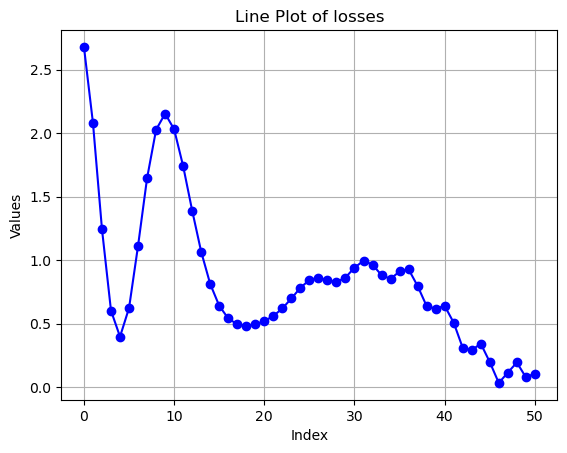

In [127]:
# print(all_losses)
# print(w1_total)
# print(w2_total)

x = range(len(all_losses))  # Generates x values as [0, 1, 2] to match the indices of y

# Plot
plt.plot(x, all_losses, marker='o', color='blue')  # 'marker' to show each data point
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Line Plot of losses")
plt.grid(True)
plt.show()

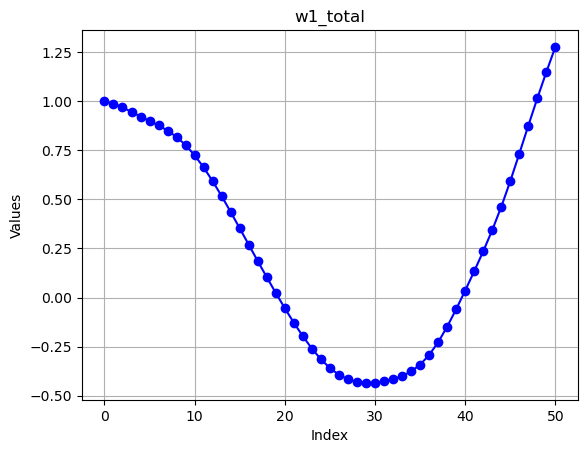

In [128]:

x = range(len(w1_total))  # Generates x values as [0, 1, 2] to match the indices of y

# Plot
plt.plot(x, w1_total, marker='o', color='blue')  # 'marker' to show each data point
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("w1_total")
plt.grid(True)
plt.show()

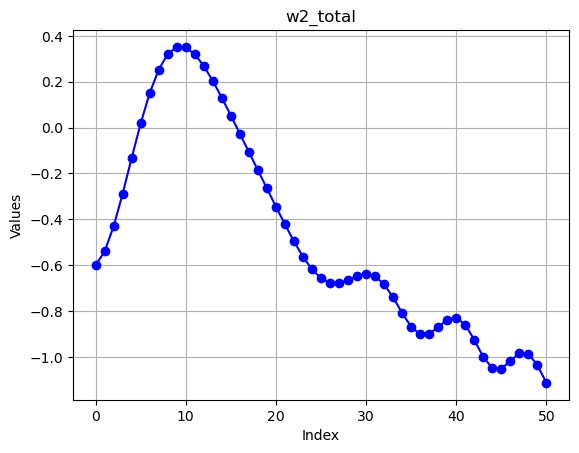

In [129]:
x = range(len(w2_total))  # Generates x values as [0, 1, 2] to match the indices of y

# Plot
plt.plot(x, w2_total, marker='o', color='blue')  # 'marker' to show each data point
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("w2_total")
plt.grid(True)
plt.show()

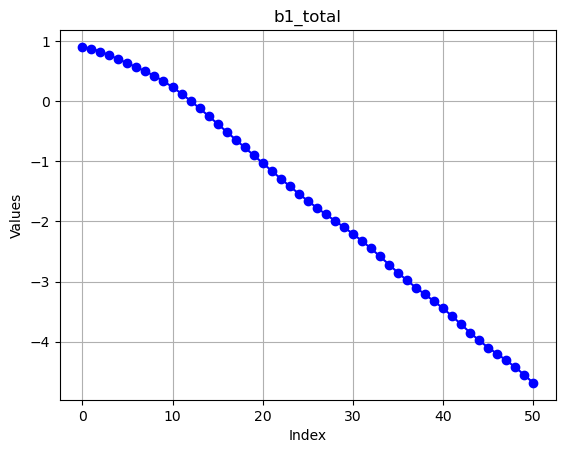

In [130]:
x = range(len(b1_total))  # Generates x values as [0, 1, 2] to match the indices of y

# Plot
plt.plot(x, b1_total, marker='o', color='blue')  # 'marker' to show each data point
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("b1_total")
plt.grid(True)
plt.show()

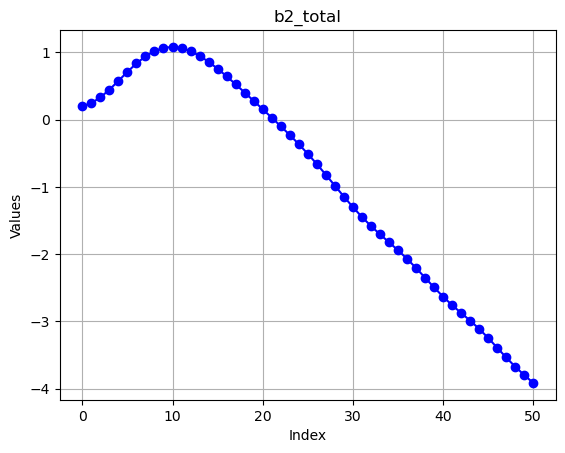

In [131]:
x = range(len(b1_total))  # Generates x values as [0, 1, 2] to match the indices of y

# Plot
plt.plot(x, b2_total, marker='o', color='blue')  # 'marker' to show each data point
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("b2_total")
plt.grid(True)
plt.show()

In [132]:
total_loss.data

0.10601862472398083

## Now lets alternate the updating of Weights and biases

In [133]:
# reset the weights and biases

w1 = Value(1.0,label='w1')
w2 = Value(-0.6,label='w2')
b1 = Value(0.9,label='b1')
b2 = Value(0.2,label='b2')
x1 = Value(1.0,label='x1')
x2 = Value(0.0,label='x2')


x1w1 = x1*w1 ; x1w1.label = 'x1w1'

x1w1b1 = x1w1 + b1 ; x1w1b1.label = 'x1w1b1'

x1w1b1w2 = x1w1b1 * w2 ;  x1w1b1w2.label = 'x1w1b1w2'

x1w1b1w2b2 = x1w1b1w2 + b2; x1w1b1w2b2.label = 'x1w1b1w2b2'

x2 = Value(0.0,label='x2')


x2w1 = x2*w1 ; x2w1.label = 'x2w1'

x2w1b1 = x2w1 + b1 ; x2w1b1.label = 'x2w1b1'

x2w1b1w2 = x2w1b1 * w2 ;  x2w1b1w2.label = 'x2w1b1w2'

x2w1b1w2b2 = x2w1b1w2 + b2; x2w1b1w2b2.label = 'x2w1b1w2b2'



y_real_1= Value(0.0,label = 'y_real_1')
y_real_2 = Value(1.0,label = 'y_real_2')

loss1 = (x1w1b1w2b2 - y_real_1) **2 ; loss1.label = 'loss1'

loss2 = (x2w1b1w2b2 - y_real_2) **2 ; loss2.label = 'loss2'


total_loss = loss1+ loss2; total_loss.label = 'total_loss'


total_loss.backward()

In [134]:
# backward pass:


w1_total = [w1.data]
w2_total = [w2.data]

b1_total = [b1.data]
b2_total = [b2.data]
all_losses = [total_loss.data]




for i in range(25):

    #updating gradients
    w1.data += -0.01 * w1.grad
    w2.data += -0.01 * w2.grad
    # b1.data += -0.01 * b1.grad
    # b2.data += -0.01 * b2.grad
    w1_total.append(w1.data)
    w2_total.append(w2.data)
    b1_total.append(b1.data)
    b2_total.append(b2.data)

    
    
    x1w1 = x1*w1 ; x1w1.label = 'x1w1'
    x1w1b1 = x1w1 + b1 ; x1w1b1.label = 'x1w1b1'
    x1w1b1w2 = x1w1b1 * w2 ;  x1w1b1w2.label = 'x1w1b1w2'
    x1w1b1w2b2 = x1w1b1w2 + b2; x1w1b1w2b2.label = 'x1w1b1w2b2'
    
        
    x2w1 = x2*w1 ; x2w1.label = 'x2w1'
    x2w1b1 = x2w1 + b1 ; x2w1b1.label = 'x2w1b1'
    x2w1b1w2 = x2w1b1 * w2 ;  x2w1b1w2.label = 'x2w1b1w2'
    x2w1b1w2b2 = x2w1b1w2 + b2; x2w1b1w2b2.label = 'x2w1b1w2b2'


    # calculating loss
    loss1 = (x1w1b1w2b2 - y_real_1) **2 ; loss1.label = 'loss1'
    loss2 = (x2w1b1w2b2 - y_real_2) **2 ; loss2.label = 'loss2'
    total_loss = loss1+ loss2; total_loss.label = 'total_loss'
    all_losses.append(total_loss.data)
    total_loss.backward()


for i in range(25):

    #updating gradients
    # w1.data += -0.01 * w1.grad
    # w2.data += -0.01 * w2.grad
    b1.data += -0.01 * b1.grad
    b2.data += -0.01 * b2.grad
    w1_total.append(w1.data)
    w2_total.append(w2.data)
    b1_total.append(b1.data)
    b2_total.append(b2.data)

    
    
    x1w1 = x1*w1 ; x1w1.label = 'x1w1'
    x1w1b1 = x1w1 + b1 ; x1w1b1.label = 'x1w1b1'
    x1w1b1w2 = x1w1b1 * w2 ;  x1w1b1w2.label = 'x1w1b1w2'
    x1w1b1w2b2 = x1w1b1w2 + b2; x1w1b1w2b2.label = 'x1w1b1w2b2'
    
        
    x2w1 = x2*w1 ; x2w1.label = 'x2w1'
    x2w1b1 = x2w1 + b1 ; x2w1b1.label = 'x2w1b1'
    x2w1b1w2 = x2w1b1 * w2 ;  x2w1b1w2.label = 'x2w1b1w2'
    x2w1b1w2b2 = x2w1b1w2 + b2; x2w1b1w2b2.label = 'x2w1b1w2b2'


    # calculating loss
    loss1 = (x1w1b1w2b2 - y_real_1) **2 ; loss1.label = 'loss1'
    loss2 = (x2w1b1w2b2 - y_real_2) **2 ; loss2.label = 'loss2'
    total_loss = loss1+ loss2; total_loss.label = 'total_loss'
    all_losses.append(total_loss.data)
    total_loss.backward()

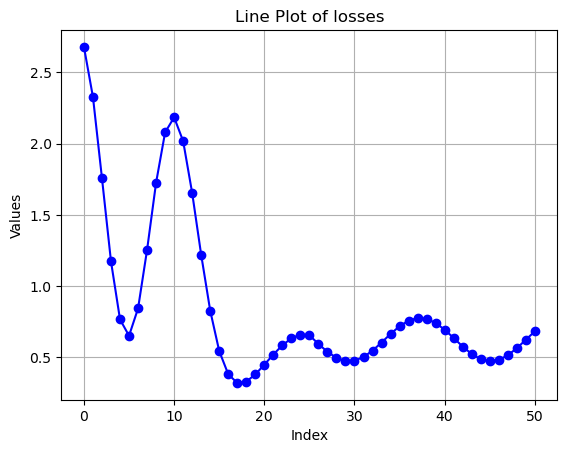

In [135]:
# print(all_losses)
# print(w1_total)
# print(w2_total)

x = range(len(all_losses))  # Generates x values as [0, 1, 2] to match the indices of y

# Plot
plt.plot(x, all_losses, marker='o', color='blue')  # 'marker' to show each data point
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Line Plot of losses")
plt.grid(True)
plt.show()

In [136]:
total_loss.data

0.6822413345161953

### Other way around

In [140]:
# reset the weights and biases

w1 = Value(1.0,label='w1')
w2 = Value(-0.6,label='w2')
b1 = Value(0.9,label='b1')
b2 = Value(0.2,label='b2')
x1 = Value(1.0,label='x1')
x2 = Value(0.0,label='x2')


x1w1 = x1*w1 ; x1w1.label = 'x1w1'

x1w1b1 = x1w1 + b1 ; x1w1b1.label = 'x1w1b1'

x1w1b1w2 = x1w1b1 * w2 ;  x1w1b1w2.label = 'x1w1b1w2'

x1w1b1w2b2 = x1w1b1w2 + b2; x1w1b1w2b2.label = 'x1w1b1w2b2'

x2 = Value(0.0,label='x2')


x2w1 = x2*w1 ; x2w1.label = 'x2w1'

x2w1b1 = x2w1 + b1 ; x2w1b1.label = 'x2w1b1'

x2w1b1w2 = x2w1b1 * w2 ;  x2w1b1w2.label = 'x2w1b1w2'

x2w1b1w2b2 = x2w1b1w2 + b2; x2w1b1w2b2.label = 'x2w1b1w2b2'



y_real_1= Value(0.0,label = 'y_real_1')
y_real_2 = Value(1.0,label = 'y_real_2')

loss1 = (x1w1b1w2b2 - y_real_1) **2 ; loss1.label = 'loss1'

loss2 = (x2w1b1w2b2 - y_real_2) **2 ; loss2.label = 'loss2'


total_loss = loss1+ loss2; total_loss.label = 'total_loss'


total_loss.backward()

In [141]:
# backward pass:


w1_total = [w1.data]
w2_total = [w2.data]

b1_total = [b1.data]
b2_total = [b2.data]
all_losses = [total_loss.data]




for i in range(25):

    #updating gradients
    # w1.data += -0.01 * w1.grad
    # w2.data += -0.01 * w2.grad
    b1.data += -0.01 * b1.grad
    b2.data += -0.01 * b2.grad
    w1_total.append(w1.data)
    w2_total.append(w2.data)
    b1_total.append(b1.data)
    b2_total.append(b2.data)

    
    
    x1w1 = x1*w1 ; x1w1.label = 'x1w1'
    x1w1b1 = x1w1 + b1 ; x1w1b1.label = 'x1w1b1'
    x1w1b1w2 = x1w1b1 * w2 ;  x1w1b1w2.label = 'x1w1b1w2'
    x1w1b1w2b2 = x1w1b1w2 + b2; x1w1b1w2b2.label = 'x1w1b1w2b2'
    
        
    x2w1 = x2*w1 ; x2w1.label = 'x2w1'
    x2w1b1 = x2w1 + b1 ; x2w1b1.label = 'x2w1b1'
    x2w1b1w2 = x2w1b1 * w2 ;  x2w1b1w2.label = 'x2w1b1w2'
    x2w1b1w2b2 = x2w1b1w2 + b2; x2w1b1w2b2.label = 'x2w1b1w2b2'


    # calculating loss
    loss1 = (x1w1b1w2b2 - y_real_1) **2 ; loss1.label = 'loss1'
    loss2 = (x2w1b1w2b2 - y_real_2) **2 ; loss2.label = 'loss2'
    total_loss = loss1+ loss2; total_loss.label = 'total_loss'
    all_losses.append(total_loss.data)
    total_loss.backward()


for i in range(25):

    #updating gradients
    w1.data += -0.01 * w1.grad
    w2.data += -0.01 * w2.grad
    # b1.data += -0.01 * b1.grad
    # b2.data += -0.01 * b2.grad
    w1_total.append(w1.data)
    w2_total.append(w2.data)
    b1_total.append(b1.data)
    b2_total.append(b2.data)

    
    
    x1w1 = x1*w1 ; x1w1.label = 'x1w1'
    x1w1b1 = x1w1 + b1 ; x1w1b1.label = 'x1w1b1'
    x1w1b1w2 = x1w1b1 * w2 ;  x1w1b1w2.label = 'x1w1b1w2'
    x1w1b1w2b2 = x1w1b1w2 + b2; x1w1b1w2b2.label = 'x1w1b1w2b2'
    
        
    x2w1 = x2*w1 ; x2w1.label = 'x2w1'
    x2w1b1 = x2w1 + b1 ; x2w1b1.label = 'x2w1b1'
    x2w1b1w2 = x2w1b1 * w2 ;  x2w1b1w2.label = 'x2w1b1w2'
    x2w1b1w2b2 = x2w1b1w2 + b2; x2w1b1w2b2.label = 'x2w1b1w2b2'


    # calculating loss
    loss1 = (x1w1b1w2b2 - y_real_1) **2 ; loss1.label = 'loss1'
    loss2 = (x2w1b1w2b2 - y_real_2) **2 ; loss2.label = 'loss2'
    total_loss = loss1+ loss2; total_loss.label = 'total_loss'
    all_losses.append(total_loss.data)
    total_loss.backward()

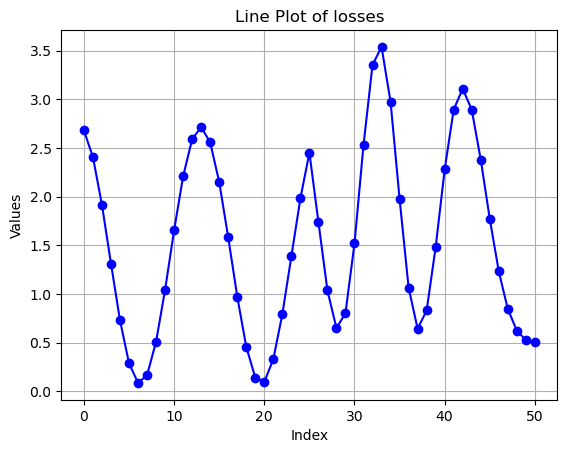

In [142]:
# print(all_losses)
# print(w1_total)
# print(w2_total)

x = range(len(all_losses))  # Generates x values as [0, 1, 2] to match the indices of y

# Plot
plt.plot(x, all_losses, marker='o', color='blue')  # 'marker' to show each data point
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Line Plot of losses")
plt.grid(True)
plt.show()

In [143]:
total_loss.data

0.508818501920141

### Alternating

In [144]:
# reset the weights and biases

w1 = Value(1.0,label='w1')
w2 = Value(-0.6,label='w2')
b1 = Value(0.9,label='b1')
b2 = Value(0.2,label='b2')
x1 = Value(1.0,label='x1')
x2 = Value(0.0,label='x2')


x1w1 = x1*w1 ; x1w1.label = 'x1w1'

x1w1b1 = x1w1 + b1 ; x1w1b1.label = 'x1w1b1'

x1w1b1w2 = x1w1b1 * w2 ;  x1w1b1w2.label = 'x1w1b1w2'

x1w1b1w2b2 = x1w1b1w2 + b2; x1w1b1w2b2.label = 'x1w1b1w2b2'

x2 = Value(0.0,label='x2')


x2w1 = x2*w1 ; x2w1.label = 'x2w1'

x2w1b1 = x2w1 + b1 ; x2w1b1.label = 'x2w1b1'

x2w1b1w2 = x2w1b1 * w2 ;  x2w1b1w2.label = 'x2w1b1w2'

x2w1b1w2b2 = x2w1b1w2 + b2; x2w1b1w2b2.label = 'x2w1b1w2b2'



y_real_1= Value(0.0,label = 'y_real_1')
y_real_2 = Value(1.0,label = 'y_real_2')

loss1 = (x1w1b1w2b2 - y_real_1) **2 ; loss1.label = 'loss1'

loss2 = (x2w1b1w2b2 - y_real_2) **2 ; loss2.label = 'loss2'


total_loss = loss1+ loss2; total_loss.label = 'total_loss'


total_loss.backward()

In [145]:
# backward pass:


w1_total = [w1.data]
w2_total = [w2.data]

b1_total = [b1.data]
b2_total = [b2.data]
all_losses = [total_loss.data]




for i in range(50):

    if i%2 ==0 :

        #updating gradients
        # w1.data += -0.01 * w1.grad
        # w2.data += -0.01 * w2.grad
        b1.data += -0.01 * b1.grad
        b2.data += -0.01 * b2.grad
        w1_total.append(w1.data)
        w2_total.append(w2.data)
        b1_total.append(b1.data)
        b2_total.append(b2.data)
    
        
        
        x1w1 = x1*w1 ; x1w1.label = 'x1w1'
        x1w1b1 = x1w1 + b1 ; x1w1b1.label = 'x1w1b1'
        x1w1b1w2 = x1w1b1 * w2 ;  x1w1b1w2.label = 'x1w1b1w2'
        x1w1b1w2b2 = x1w1b1w2 + b2; x1w1b1w2b2.label = 'x1w1b1w2b2'
        
            
        x2w1 = x2*w1 ; x2w1.label = 'x2w1'
        x2w1b1 = x2w1 + b1 ; x2w1b1.label = 'x2w1b1'
        x2w1b1w2 = x2w1b1 * w2 ;  x2w1b1w2.label = 'x2w1b1w2'
        x2w1b1w2b2 = x2w1b1w2 + b2; x2w1b1w2b2.label = 'x2w1b1w2b2'
    
    
        # calculating loss
        loss1 = (x1w1b1w2b2 - y_real_1) **2 ; loss1.label = 'loss1'
        loss2 = (x2w1b1w2b2 - y_real_2) **2 ; loss2.label = 'loss2'
        total_loss = loss1+ loss2; total_loss.label = 'total_loss'
        all_losses.append(total_loss.data)
        total_loss.backward()


    if i%2 ==1:
                #updating gradients
        w1.data += -0.01 * w1.grad
        w2.data += -0.01 * w2.grad
        # b1.data += -0.01 * b1.grad
        # b2.data += -0.01 * b2.grad
        w1_total.append(w1.data)
        w2_total.append(w2.data)
        b1_total.append(b1.data)
        b2_total.append(b2.data)
    
        
        
        x1w1 = x1*w1 ; x1w1.label = 'x1w1'
        x1w1b1 = x1w1 + b1 ; x1w1b1.label = 'x1w1b1'
        x1w1b1w2 = x1w1b1 * w2 ;  x1w1b1w2.label = 'x1w1b1w2'
        x1w1b1w2b2 = x1w1b1w2 + b2; x1w1b1w2b2.label = 'x1w1b1w2b2'
        
            
        x2w1 = x2*w1 ; x2w1.label = 'x2w1'
        x2w1b1 = x2w1 + b1 ; x2w1b1.label = 'x2w1b1'
        x2w1b1w2 = x2w1b1 * w2 ;  x2w1b1w2.label = 'x2w1b1w2'
        x2w1b1w2b2 = x2w1b1w2 + b2; x2w1b1w2b2.label = 'x2w1b1w2b2'
    
    
        # calculating loss
        loss1 = (x1w1b1w2b2 - y_real_1) **2 ; loss1.label = 'loss1'
        loss2 = (x2w1b1w2b2 - y_real_2) **2 ; loss2.label = 'loss2'
        total_loss = loss1+ loss2; total_loss.label = 'total_loss'
        all_losses.append(total_loss.data)
        total_loss.backward()
        


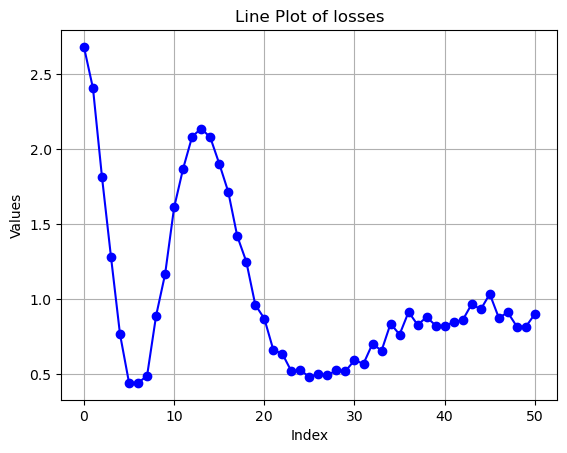

In [146]:
# print(all_losses)
# print(w1_total)
# print(w2_total)

x = range(len(all_losses))  # Generates x values as [0, 1, 2] to match the indices of y

# Plot
plt.plot(x, all_losses, marker='o', color='blue')  # 'marker' to show each data point
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Line Plot of losses")
plt.grid(True)
plt.show()

In [147]:
total_loss.data

0.8985499928350178

### other way around

In [156]:
# reset the weights and biases

w1 = Value(1.0,label='w1')
w2 = Value(-0.6,label='w2')
b1 = Value(0.9,label='b1')
b2 = Value(0.2,label='b2')
x1 = Value(1.0,label='x1')
x2 = Value(0.0,label='x2')


x1w1 = x1*w1 ; x1w1.label = 'x1w1'

x1w1b1 = x1w1 + b1 ; x1w1b1.label = 'x1w1b1'

x1w1b1w2 = x1w1b1 * w2 ;  x1w1b1w2.label = 'x1w1b1w2'

x1w1b1w2b2 = x1w1b1w2 + b2; x1w1b1w2b2.label = 'x1w1b1w2b2'

x2 = Value(0.0,label='x2')


x2w1 = x2*w1 ; x2w1.label = 'x2w1'

x2w1b1 = x2w1 + b1 ; x2w1b1.label = 'x2w1b1'

x2w1b1w2 = x2w1b1 * w2 ;  x2w1b1w2.label = 'x2w1b1w2'

x2w1b1w2b2 = x2w1b1w2 + b2; x2w1b1w2b2.label = 'x2w1b1w2b2'



y_real_1= Value(0.0,label = 'y_real_1')
y_real_2 = Value(1.0,label = 'y_real_2')

loss1 = (x1w1b1w2b2 - y_real_1) **2 ; loss1.label = 'loss1'

loss2 = (x2w1b1w2b2 - y_real_2) **2 ; loss2.label = 'loss2'


total_loss = loss1+ loss2; total_loss.label = 'total_loss'


total_loss.backward()

In [157]:
# backward pass:


w1_total = [w1.data]
w2_total = [w2.data]

b1_total = [b1.data]
b2_total = [b2.data]
all_losses = [total_loss.data]




for i in range(62):

    if i%2 ==1 :

        #updating gradients
        # w1.data += -0.01 * w1.grad
        # w2.data += -0.01 * w2.grad
        b1.data += -0.01 * b1.grad
        b2.data += -0.01 * b2.grad
        w1_total.append(w1.data)
        w2_total.append(w2.data)
        b1_total.append(b1.data)
        b2_total.append(b2.data)
    
        
        
        x1w1 = x1*w1 ; x1w1.label = 'x1w1'
        x1w1b1 = x1w1 + b1 ; x1w1b1.label = 'x1w1b1'
        x1w1b1w2 = x1w1b1 * w2 ;  x1w1b1w2.label = 'x1w1b1w2'
        x1w1b1w2b2 = x1w1b1w2 + b2; x1w1b1w2b2.label = 'x1w1b1w2b2'
        
            
        x2w1 = x2*w1 ; x2w1.label = 'x2w1'
        x2w1b1 = x2w1 + b1 ; x2w1b1.label = 'x2w1b1'
        x2w1b1w2 = x2w1b1 * w2 ;  x2w1b1w2.label = 'x2w1b1w2'
        x2w1b1w2b2 = x2w1b1w2 + b2; x2w1b1w2b2.label = 'x2w1b1w2b2'
    
    
        # calculating loss
        loss1 = (x1w1b1w2b2 - y_real_1) **2 ; loss1.label = 'loss1'
        loss2 = (x2w1b1w2b2 - y_real_2) **2 ; loss2.label = 'loss2'
        total_loss = loss1+ loss2; total_loss.label = 'total_loss'
        all_losses.append(total_loss.data)
        total_loss.backward()


    if i%2 ==0:
                #updating gradients
        w1.data += -0.01 * w1.grad
        w2.data += -0.01 * w2.grad
        # b1.data += -0.01 * b1.grad
        # b2.data += -0.01 * b2.grad
        w1_total.append(w1.data)
        w2_total.append(w2.data)
        b1_total.append(b1.data)
        b2_total.append(b2.data)
    
        
        
        x1w1 = x1*w1 ; x1w1.label = 'x1w1'
        x1w1b1 = x1w1 + b1 ; x1w1b1.label = 'x1w1b1'
        x1w1b1w2 = x1w1b1 * w2 ;  x1w1b1w2.label = 'x1w1b1w2'
        x1w1b1w2b2 = x1w1b1w2 + b2; x1w1b1w2b2.label = 'x1w1b1w2b2'
        
            
        x2w1 = x2*w1 ; x2w1.label = 'x2w1'
        x2w1b1 = x2w1 + b1 ; x2w1b1.label = 'x2w1b1'
        x2w1b1w2 = x2w1b1 * w2 ;  x2w1b1w2.label = 'x2w1b1w2'
        x2w1b1w2b2 = x2w1b1w2 + b2; x2w1b1w2b2.label = 'x2w1b1w2b2'
    
    
        # calculating loss
        loss1 = (x1w1b1w2b2 - y_real_1) **2 ; loss1.label = 'loss1'
        loss2 = (x2w1b1w2b2 - y_real_2) **2 ; loss2.label = 'loss2'
        total_loss = loss1+ loss2; total_loss.label = 'total_loss'
        all_losses.append(total_loss.data)
        total_loss.backward()
        


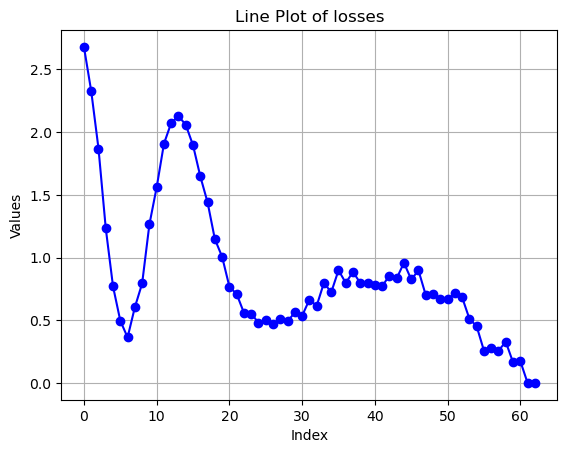

In [158]:
# print(all_losses)
# print(w1_total)
# print(w2_total)

x = range(len(all_losses))  # Generates x values as [0, 1, 2] to match the indices of y

# Plot
plt.plot(x, all_losses, marker='o', color='blue')  # 'marker' to show each data point
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Line Plot of losses")
plt.grid(True)
plt.show()

In [159]:
total_loss.data

0.00509860841816932

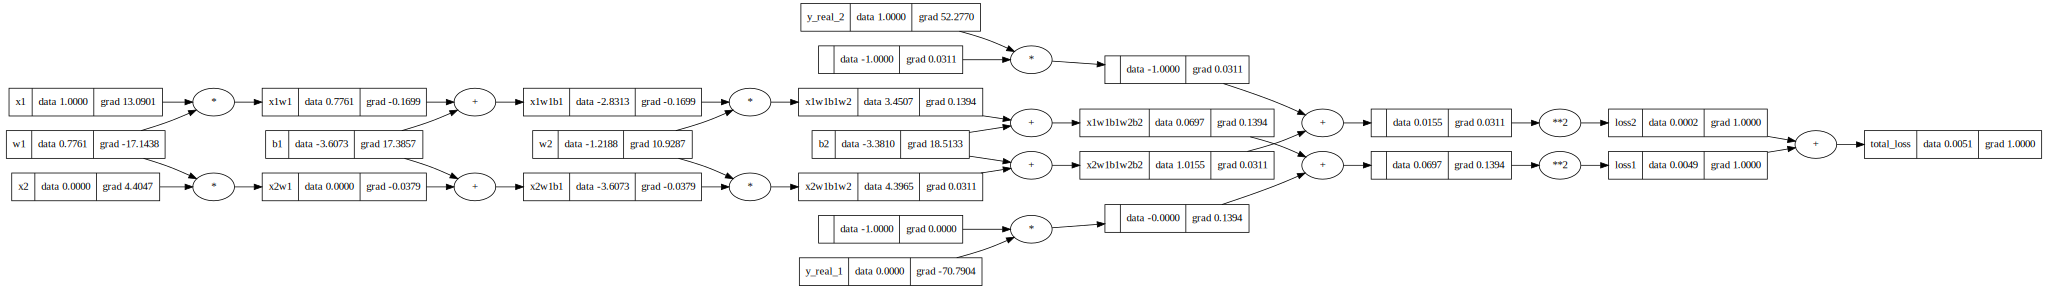

In [160]:
draw_dot(total_loss)

## Conclusion (for now)

1. updating the weights and biases doesn't really make sense to me, I should why with graphs, that updating the biases and weights actually change the loss function as a whole
2. But when i try to update them one at a time, it also doesn't learn any better, even thought hypothetically I thought they do. This tells me that the relationships are more complex than I thought
3. I still have to figure out how to optimally update them.